# Laplacian of Gaussian
***


In [14]:
#notebook imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

In [2]:
# loading in images 
flowers = cv2.imread('../Image_Data/flowers.jpg')
flowers = cv2.cvtColor(flowers, cv2.COLOR_BGR2RGB)
gray_flowers = cv2.cvtColor(flowers, cv2.COLOR_RGB2GRAY)

***
## LoG Visualization

In [5]:
def create_LoG(x_range, y_range, sigma):
    x, y = np.mgrid[-x_range:x_range:.01, -y_range:y_range:.01]
    x = np.square(x)
    y = np.square(y)
    variance = np.square(sigma)
    LoG_vals = ((1 - (x + y)/(2 * variance)) * np.exp(-(x + y)/(2 * variance))) / (-np.pi * variance * variance)
    return LoG_vals

In [15]:
def plot_LoG(points, angle1=30, angle2=30):
    xv, yv = np.mgrid[0:len(points), 0:len(points[0])]
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    dem3d=ax.plot_surface(xv,yv,points, cmap='winter', edgecolor='none')
    ax.view_init(angle1, angle2)
    plt.show()

In [21]:
LoG_kernel = create_LoG(5, 5, 1)

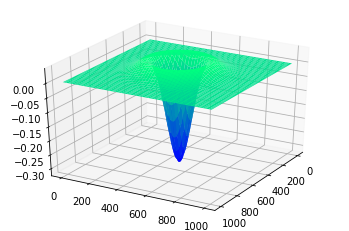

In [22]:
plot_LoG(LoG_kernel)

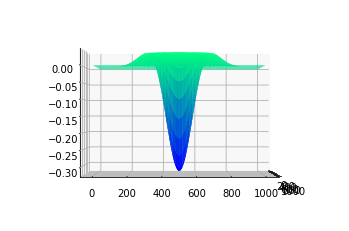

In [23]:
plot_LoG(LoG_kernel, 0, 0)

***
## Manual Laplacian

In [68]:
# setting up sobel parameters to use in Laplacian
dx = 2
dy = 2
ddepth = cv2.CV_16S

# attempting another way
sobelx = cv2.Sobel(gray_flowers, ddepth, 1, 0, ksize=5)
sobelx = cv2.Sobel(sobelx, ddepth, 1, 0, ksize=5)

sobely = cv2.Sobel(gray_flowers, ddepth, 0, 1, ksize=5)
sobely = cv2.Sobel(sobelx, ddepth, 0, 1, ksize=5)

sobelx2 = cv2.Sobel(gray_flowers, ddepth, dx, 0, ksize=5)
sobely2 = cv2.Sobel(gray_flowers, ddepth, 0, dy, ksize=5)

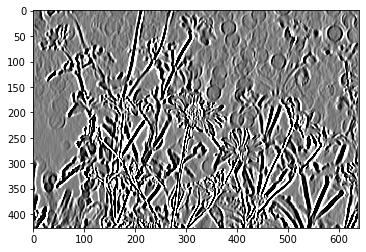

In [67]:
plt.imshow(sobelx, cmap='gray')

In [75]:
# creating Laplacian by adding sobels together
laplacian = sobelx2 + sobely2
# laplacian = np.where(laplacian < 0, laplacian*0, laplacian)
# laplacian = cv2.convertScaleAbs(laplacian)

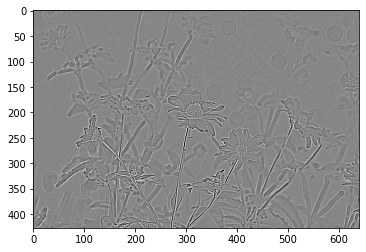

In [76]:
plt.imshow(laplacian, cmap='gray')

***
## Manual Laplacian of Gaussian

In [60]:
# first blur the image using a Gaussian filter to remove noise before grayscale conversion
flowers_gauss = flowers.copy()
flowers_gauss = cv2.GaussianBlur(flowers_gauss, (3,3), 0, 0)
flowers_gauss_gray = cv2.cvtColor(flowers_gauss, cv2.COLOR_RGB2GRAY)
flowers_gauss_gray = np.float32(flowers_gauss_gray)

In [61]:
# getting 2nd img derivatives
sobelx2_log = cv2.Sobel(flowers_gauss_gray, ddepth, dx, 0, ksize=5)
sobely2_log = cv2.Sobel(flowers_gauss_gray, ddepth, 0, dy, ksize=5)

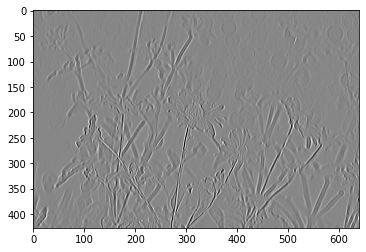

In [62]:
plt.imshow(sobelx2_log, cmap='gray')

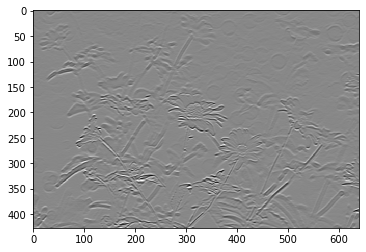

In [63]:
plt.imshow(sobely2_log, cmap='gray')

In [64]:
# creating Laplacian by adding sobels together
log = sobelx2_log + sobely2_log
log = np.where(log < 0, log*0, log)
print(log.min(), log.max())
# log = cv2.convertScaleAbs(log)

0 2598


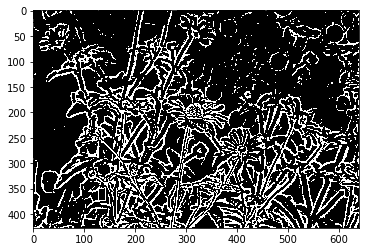

In [65]:
# this image is much less noisy compared to without gaussian smoothing
# tried thresholding, didn't help much, how does cv Laplacian work
# there's something that's missing
ret, log_res = cv2.threshold(log, 127, 255, cv2.THRESH_BINARY)
plt.imshow(log_res, cmap='gray')

***
## Shortening the Process with opencv

In [30]:
# we can use the same gaussian as before
ddepth = cv2.CV_16S
log_cv = cv2.Laplacian(flowers_gauss_gray, ddepth, 5)
log_cv = cv2.convertScaleAbs(log_cv)

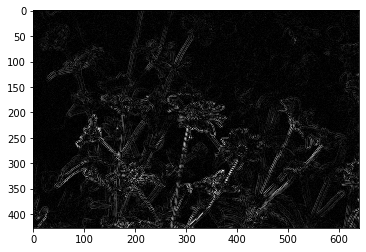

In [31]:
plt.imshow(log_cv, cmap='gray')

***
## References
* https://homepages.inf.ed.ac.uk/rbf/HIPR2/log.htm
***